In [1]:
!pip install --upgrade pip seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("Minnesota Vikings Case Study.xlsx", 'Stubhub Sales Data')
data.head()


,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price
0,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-09 17:00:14,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,136,US Bank Stadium,Lower Corner,Lower Corner 138,26,3,26.0,28.0,68.75,206.25
1,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-09 21:02:08,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,136,US Bank Stadium,Loge Sideline,Loge Sideline 312,A,4,30.0,33.0,64.00,256.00
2,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-10 14:10:52,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,135,US Bank Stadium,Middle Sideline,Middle Sideline 217,14,2,9.0,10.0,29.50,59.00
3,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-11 04:40:26,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,135,US Bank Stadium,Lower Sideline,Lower Sideline 134,2,3,13.0,15.0,130.00,390.00
4,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-11 20:15:51,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,134,US Bank Stadium,Middle Sideline,Middle Sideline 238,1,2,1.0,2.0,65.00,130.00


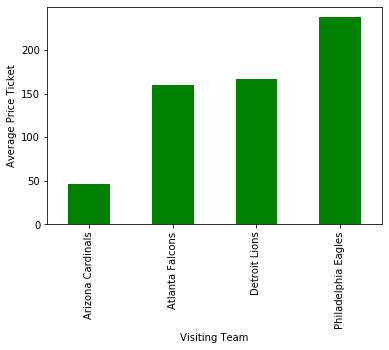

In [4]:
data.groupby('Visiting Team')['Ticket Price'].mean().plot(kind = 'bar', color='green')
plt.ylabel("Average Price Ticket")
plt.show()

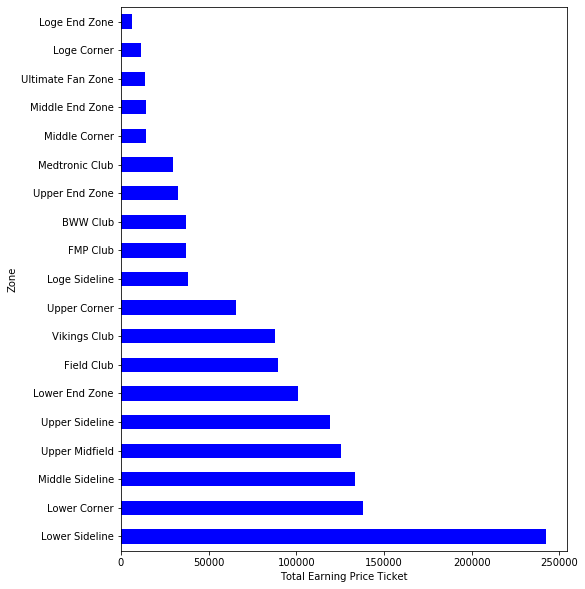

In [5]:
plt.figure(figsize=(8,10))
data.groupby('Zone')['Ticket Price'].sum().sort_values(ascending=False).plot(kind = 'barh', color= 'blue')
plt.xlabel("Total Earning Price Ticket")
plt.show()

In [6]:
data[data['Zone'] == 'Lower Sideline']['Ticket Price'].sum()

242308.13

In [7]:
data['Ticket Price'].mean()

159.98716471431922

### What is the projected value of a season ticket for each price code for the upcoming 2022 season?

In [8]:
data.groupby('Zone')['Ticket Price'].mean().sort_values(ascending=False)

Zone
Field Club           619.473172
Medtronic Club       452.948939
Vikings Club         332.012197
FMP Club             309.755750
BWW Club             271.239044
Lower Sideline       235.937809
Ultimate Fan Zone    179.693974
Middle Sideline      168.850152
Lower End Zone       161.999021
Lower Corner         160.380081
Loge Sideline        137.488993
Middle Corner        131.875091
Middle End Zone      125.624561
Upper Midfield       111.457418
Loge End Zone         95.146812
Loge Corner           94.054960
Upper Sideline        94.046680
Upper End Zone        84.780749
Upper Corner          83.908233
Name: Ticket Price, dtype: float64

In [9]:
data.Section.value_counts().head(20)

Upper Midfield 312    194
Upper Midfield 311    180
Upper Midfield 343    168
Upper Sideline 310    154
Lower Corner 103      145
Upper Sideline 315    141
Lower Sideline 107    135
Upper Sideline 345    134
Lower Sideline 106    133
Lower Corner 136      125
Lower End Zone 120    122
Upper Sideline 308    118
Lower Corner 114      116
Upper Sideline 344    115
Upper Midfield 314    113
Lower Sideline 105    112
Lower Corner 101      108
Upper Sideline 337    107
Upper Midfield 342    107
Lower Sideline 112    107
Name: Section, dtype: int64

In [10]:
# Cheapest section - blue
sections = [301, 302, 303, 304, 305, 306, 307, 318, 319, 320, 321, 322, 323, 324, 325, 
            327, 328, 329, 330, 331, 332, 333, 334, 335, 347, 348, 349]

In [11]:
data.Section.str[-3:]

0       138
1       312
2       217
3       134
4       238
       ... 
8361    241
8362    206
8363    V 3
8364    340
8365    312
Name: Section, Length: 8366, dtype: object

In [12]:
sections_blue = [301, 302, 303, 304, 305, 306, 307, 318, 319, 320, 321, 322, 323, 324, 325, 
            327, 328, 329, 330, 331, 332, 333, 334, 335, 347, 348, 349]


data['specific section'] = data.Section.str[-3:]
        

In [13]:
def calculate_earning(list_of_sections):
    total_sum = 0
    count = 0
    for i in list_of_sections:
        total_sum += data[data['specific section'] == str(i)]['Total Price'].sum()
        count += 1
        
    return total_sum / count

def calculating_len(list_of_sections):
    total_num_tickets = 0
    
    for i in list_of_sections:
        total_num_tickets += sum(data[data['specific section'] == str(i)]['Ticket Qty'])
        
    return total_num_tickets
        
    
        
calculate_earning(sections_blue) / calculating_len(sections_blue)

3.2599348455598456

## EDA

In [14]:
data.head()

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
0,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-09 17:00:14,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,136,US Bank Stadium,Lower Corner,Lower Corner 138,26,3,26.0,28.0,68.75,206.25,138
1,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-09 21:02:08,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,136,US Bank Stadium,Loge Sideline,Loge Sideline 312,A,4,30.0,33.0,64.00,256.00,312
2,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-10 14:10:52,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,135,US Bank Stadium,Middle Sideline,Middle Sideline 217,14,2,9.0,10.0,29.50,59.00,217
3,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-11 04:40:26,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,135,US Bank Stadium,Lower Sideline,Lower Sideline 134,2,3,13.0,15.0,130.00,390.00,134
4,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-11 20:15:51,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,134,US Bank Stadium,Middle Sideline,Middle Sideline 238,1,2,1.0,2.0,65.00,130.00,238


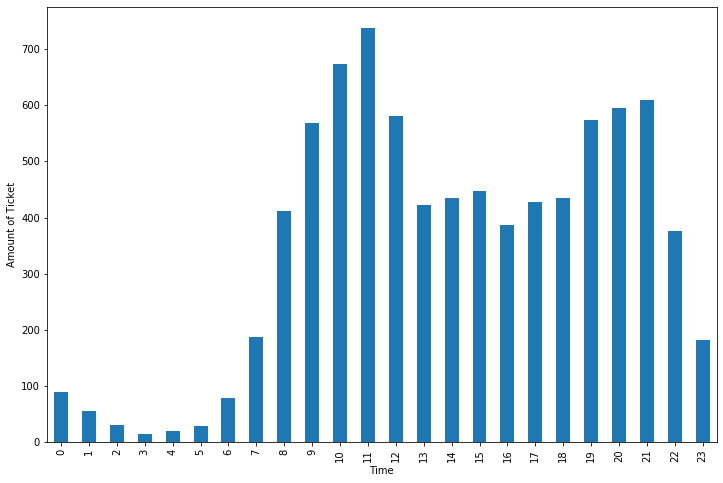

In [15]:
plt.figure(figsize = (12, 8))
data['Sale Date/Time'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.ylabel("Amount of Ticket")
plt.xlabel("Time")

plt.show()

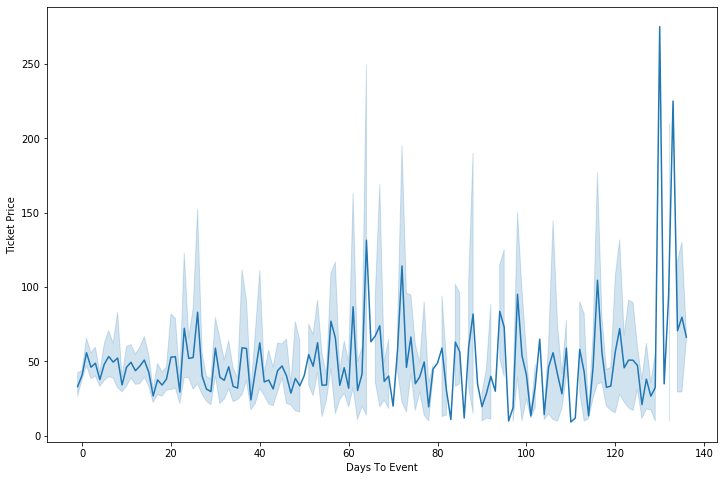

In [16]:
game_one = data[data['Event Id'] == 633298]
plt.figure(figsize = (12, 8))
sns.lineplot(data=game_one, x='Days To Event', y = 'Ticket Price')

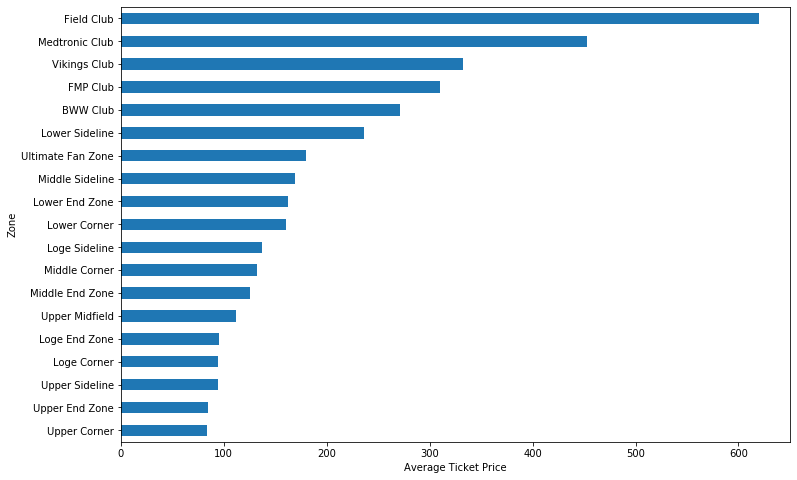

In [17]:
plt.figure(figsize = (12, 8))
data.groupby('Zone')['Ticket Price'].mean().sort_values().plot(kind='barh')
plt.xlabel("Average Ticket Price")
plt.show()

In [18]:
data.groupby('Time')['Ticket Price'].mean()

Time
2019-08-24 12:00:00     46.047036
2019-09-08 12:00:00    159.381958
2019-10-13 12:00:00    237.403717
2019-12-08 12:00:00    166.242407
Name: Ticket Price, dtype: float64

## Projected Revenue

In [19]:
data.groupby('Zone')['Ticket Price'].mean().sort_values()

Zone
Upper Corner          83.908233
Upper End Zone        84.780749
Upper Sideline        94.046680
Loge Corner           94.054960
Loge End Zone         95.146812
Upper Midfield       111.457418
Middle End Zone      125.624561
Middle Corner        131.875091
Loge Sideline        137.488993
Lower Corner         160.380081
Lower End Zone       161.999021
Middle Sideline      168.850152
Ultimate Fan Zone    179.693974
Lower Sideline       235.937809
BWW Club             271.239044
FMP Club             309.755750
Vikings Club         332.012197
Medtronic Club       452.948939
Field Club           619.473172
Name: Ticket Price, dtype: float64

In [20]:
data.Zone.value_counts()

Upper Sideline       1265
Upper Midfield       1127
Lower Sideline       1027
Lower Corner          861
Middle Sideline       790
Upper Corner          781
Lower End Zone        623
Upper End Zone        387
Loge Sideline         278
Vikings Club          264
Field Club            145
BWW Club              136
Loge Corner           125
FMP Club              120
Middle End Zone       114
Middle Corner         110
Ultimate Fan Zone      78
Loge End Zone          69
Medtronic Club         66
Name: Zone, dtype: int64

In [21]:
# 8 games in total
# Medtronic club $3700

452.948939 * 8

3623.591512

In [22]:
data.groupby('Zone')['Ticket Price'].mean().sort_values(ascending=False)

Zone
Field Club           619.473172
Medtronic Club       452.948939
Vikings Club         332.012197
FMP Club             309.755750
BWW Club             271.239044
Lower Sideline       235.937809
Ultimate Fan Zone    179.693974
Middle Sideline      168.850152
Lower End Zone       161.999021
Lower Corner         160.380081
Loge Sideline        137.488993
Middle Corner        131.875091
Middle End Zone      125.624561
Upper Midfield       111.457418
Loge End Zone         95.146812
Loge Corner           94.054960
Upper Sideline        94.046680
Upper End Zone        84.780749
Upper Corner          83.908233
Name: Ticket Price, dtype: float64

In [23]:
# Medtronic

In [24]:
# According to this data 24754 tickets were sold for the 4 games
total_tickets_sold = data['Ticket Qty'].sum()
total_tickets_sold

24754

In [25]:
# According to this data 7355 tickets were sold for the game against Philadelphia Eagles
pe_data = data[data['Visiting Team'] == 'Philadelphia Eagles']
pe_game_tickets_sold = pe_data['Ticket Qty'].sum()
pe_game_tickets_sold

7355

In [26]:
# less than 1% of the tickets sold in this game were for the Medtronic Club 
(pe_data[pe_data['Zone'] == 'Medtronic Club']['Ticket Qty'].sum() / pe_game_tickets_sold)

0.006118286879673691

In [27]:
# Average attendance for vikings game in 2019
# Medtronic season ticket price = 3700
average_attendance_2019 = 66849
medtronic_club_price = 3700
print(f"Revenue made from the Medtronic club season tickets {(average_attendance_2019 - pe_game_tickets_sold) * 0.006118286879673691 * medtronic_club_price}")

Revenue made from the Medtronic club season tickets 1346805.0305914343


In [28]:
# Section Blue

sections_blue = [301, 302, 303, 304, 305, 306, 307, 318, 319, 320, 321, 322, 323, 324, 325, 
            327, 328, 329, 330, 331, 332, 333, 334, 335, 347, 348, 349]

ticket_quantity = 0

for i in sections_blue:
    ticket_quantity += data[data['specific section'] == str(i)]['Ticket Qty'].sum()

print(ticket_quantity)

4144


# Question 1

In [29]:
# According to this data 24754 tickets were sold for the 4 games
total_tickets_sold = data['Ticket Qty'].sum()
total_tickets_sold

24754

In [30]:
season_ticket_holders = 60000

In [31]:
# this function takes a list of the specific section in the stadium and returns the percentage of tickets bought in
# that specific section
def percentage_ticket_in_section(list_specific_section):
    
    ticket_quantity = 0
    
    for i in list_specific_section:
        ticket_quantity += data[data['specific section'] == str(i)]['Ticket Qty'].sum()
    
    return ticket_quantity / total_tickets_sold

In [43]:
# it multiplies the number of season ticket holders by the percentage of tickets annd then multiplies it by the season ticket price
# it then multiplies that by the percentage of a specific section (BIG ASSUMPTION)
# and then that number is multiplies by the price of the season ticket for that section to get the revenue
def calculate_section_revenue(season_ticket_price, percentage_of_tickets, part_stadium):
    return f"Revenue made from the {part_stadium} club season tickets ${season_ticket_holders * percentage_of_tickets * season_ticket_price}"

In [44]:
# 16% of the tickets sold were in the blue location (cheapest location)

sections_blue = [301, 302, 303, 304, 305, 306, 307, 318, 319, 320, 321, 322, 323, 324, 325, 
            327, 328, 329, 330, 331, 332, 333, 334, 335, 347, 348, 349]

percentage_ticket_in_section(sections_blue)

0.167407287711077

In [45]:
# Average attendance for vikings game in 2019
# Blue ticket price = 620
average_attendance_2019 = 66849


calculate_section_revenue(620, percentage_ticket_in_section(sections_blue), 'light blue')

'Revenue made from the light blue club season tickets $6227551.102852064'

In [35]:
# $720 - beige

section_beige = [308, 309, 310, 315, 316, 317, 324, 325, 326, 336, 337,
               338, 344, 345, 346, 351, 352]

percentage_ticket_in_section(section_beige)



0.18825240365193505

In [36]:
calculate_section_revenue(720, percentage_ticket_in_section(section_beige), 'beige')

'Revenue made from the beige club season tickets $8132503.8377635935'

In [37]:
# $820 - dark green

section_dark_green = [311, 312, 313, 314, 339, 340, 341, 342, 343]

percentage_ticket_in_section(section_dark_green)


0.1613072634725701

In [38]:
calculate_section_revenue(820, percentage_ticket_in_section(section_dark_green), 'dark green')

'Revenue made from the dark green club season tickets $7936317.362850449'

In [39]:
# $850 - light green

section_light_green = [221, 222, 223, 224]

percentage_ticket_in_section(section_light_green)

0.013735153914518865

In [40]:
calculate_section_revenue(850, percentage_ticket_in_section(section_light_green), 'light green')

'Revenue made from the light green club season tickets $700492.8496404621'

In [41]:
# $950 - yellow

section_yellow = [219, 220, 225, 226, 242]
percentage_ticket_in_section(section_yellow)

0.01244243354609356

In [42]:
calculate_section_revenue(950, percentage_ticket_in_section(section_yellow), 'yellow')

'Revenue made from the yellow club season tickets $709218.7121273329'

In [43]:
# $1150 - brown

section_brown = [206, 207, 208, 214, 215, 216, 217, 218, 227, 228,
                 229, 230, 231, 237, 238, 239, 240, 241]

percentage_ticket_in_section(section_brown)

0.09028843823220489

In [44]:
calculate_section_revenue(1150, percentage_ticket_in_section(section_brown), 'brown')

'Revenue made from the brown club season tickets $6941045.578492364'

In [45]:
# $1220 - purple
section_purple = [101, 143, 142, 141, 140, 138, 116, 118, 120, 121,
                 122]
percentage_ticket_in_section(section_purple)

0.11888987638361477

In [46]:
calculate_section_revenue(1220, percentage_ticket_in_section(section_brown), 'purple')

'Revenue made from the purple club season tickets $7363544.005009291'

In [47]:
# $1320 - light purple
section_light_purple = [114, 1033, 124, 136]
percentage_ticket_in_section(section_light_purple)

0.038539225983679405

In [48]:
calculate_section_revenue(1320, percentage_ticket_in_section(section_light_purple), 'light purple')

'Revenue made from the light purple club season tickets $3400727.507473539'

In [49]:
# $1740 - Grey
section_grey = [105, 106, 107, 111, 112, 113, 127, 128, 129, 126, 
               130, 131, 132, 133, 134, 135]
percentage_ticket_in_section(section_grey)

0.11783954108426921

In [50]:
calculate_section_revenue(1740, percentage_ticket_in_section(section_grey), 'Grey')

'Revenue made from the Grey club season tickets $13706772.538579622'

In [51]:
# $2150 - FMP club

section_fmp = [' C1', ' C2', ' C3', ' C4', ' C5', ' C6', ' C7', ' C8', ' C9', 'C10']
percentage_ticket_in_section(section_fmp)

0.025612022299426357

In [52]:
calculate_section_revenue(2150, percentage_ticket_in_section(section_fmp), 'fmp club')

'Revenue made from the fmp club club season tickets $3681096.8691928578'

In [53]:
# $3150 - polaris club

section_polaris = ['V 1', 'V 2', 'V 3', 'V 4', 'V 5']
percentage_ticket_in_section(section_polaris)

0.02637957501817888

In [54]:
calculate_section_revenue(3150, percentage_ticket_in_section(section_polaris), 'polaris club')

'Revenue made from the polaris club club season tickets $5554861.862729256'

In [55]:
# $3700 - medtronic

section_medtronic = [' V6', ' V7', ' V8', ' V9', 'V10']
percentage_ticket_in_section(section_medtronic)

0.006261614284560071

In [56]:
calculate_section_revenue(3700, percentage_ticket_in_section(section_medtronic), 'medtronic club')

'Revenue made from the medtronic club club season tickets $1548755.817241658'

In [46]:
# $4200 - Delta club

section_delta = [' F1', ' F2', ' F3', ' F4', ' F5']
percentage_ticket_in_section(section_delta)

0.01349276884543912

In [47]:
calculate_section_revenue(4200, percentage_ticket_in_section(section_delta), 'delta sky club')

'Revenue made from the delta sky club club season tickets $3400177.749050658'

In [48]:
pe_game_tickets_sold

7355

In [49]:
print(f"light blue members {(average_attendance_2019 - pe_game_tickets_sold) * 0.167407287711077}")
print(f"beige members {(average_attendance_2019 - pe_game_tickets_sold) * 0.18825240365193505}")
print(f"dark green {(average_attendance_2019 - pe_game_tickets_sold) * 0.1613072634725701}")
print(f"light green {(average_attendance_2019 - pe_game_tickets_sold) * 0.013735153914518865}")
print(f"yellow {(average_attendance_2019 - pe_game_tickets_sold) * 0.01244243354609356}")
print(f"brown {(average_attendance_2019 - pe_game_tickets_sold) * 0.09028843823220489}")
print(f"purple {(average_attendance_2019 - pe_game_tickets_sold) * 0.11888987638361477}")
print(f"light purple {(average_attendance_2019 - pe_game_tickets_sold) * 0.038539225983679405}")
print(f"Grey {(average_attendance_2019 - pe_game_tickets_sold) * 0.11783954108426921}")
print(f"FMP club {(average_attendance_2019 - pe_game_tickets_sold) * 0.025612022299426357}")
print(f"Polaris club {(average_attendance_2019 - pe_game_tickets_sold) * 0.02637957501817888}")
print(f"Medtronic club {(average_attendance_2019 - pe_game_tickets_sold) * 0.006261614284560071}")
print(f"delta sky club {(average_attendance_2019 - pe_game_tickets_sold) * 0.01349276884543912}")

light blue members 9959.729175082815
beige members 11199.888502868223
dark green 9596.814333037086
light green 817.1592469903853
yellow 740.2501413912903
brown 5371.620344186798
purple 7073.234305566777
light purple 2292.8527106730226
Grey 7010.745657267512
FMP club 1523.7616546820716
Polaris club 1569.4264361315343
Medtronic club 372.5284802456169
delta sky club 802.738789690555


In [50]:
[average_attendance_2019 * 0.167407287711077,
average_attendance_2019 * 0.18825240365193505,
average_attendance_2019 * 0.1613072634725701,
average_attendance_2019 * 0.013735153914518865,
average_attendance_2019 * 0.01244243354609356,
average_attendance_2019 * 0.09028843823220489,
average_attendance_2019  * 0.11888987638361477,
average_attendance_2019  * 0.038539225983679405,
average_attendance_2019  * 0.11783954108426921,
average_attendance_2019  * 0.025612022299426357,
average_attendance_2019 * 0.02637957501817888,
average_attendance_2019 * 0.006261614284560071,
average_attendance_2019 * 0.01349276884543912]

[11191.009776197785,
 12584.484931728206,
 10783.229255877839,
 918.1813040316716,
 831.7642401228084,
 6035.691807384665,
 7947.669346368264,
 2576.3087177829843,
 7877.455481942312,
 1712.1380786943525,
 1763.44821039024,
 418.5826533085562,
 901.9781045487598]

In [51]:
total_amount_season_members = [11191.009776197785,
 12584.484931728206,
 10783.229255877839,
 918.1813040316716,
 831.7642401228084,
 6035.691807384665,
 7947.669346368264,
 2576.3087177829843,
 7877.455481942312,
 1712.1380786943525,
 1763.44821039024,
 418.5826533085562,
 901.9781045487598]

sum(total_amount_season_members)

65541.94190837845

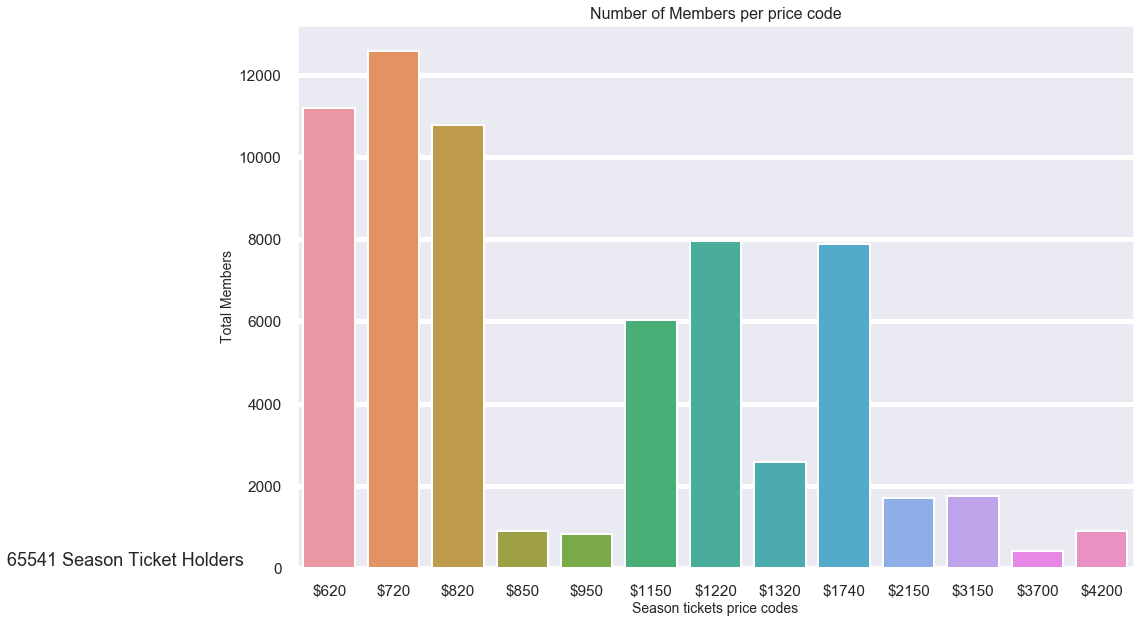

In [52]:
# Change color for each bar to their respect season

# Number of members for each section

sections = ['Light Blue', 'Beige', 'Dark green', 'Light green', 'Yellow',
           'Brown', 'Dark purple', 'Purple', 'Grey', 'FMP Club', 'Polaris Club',
           'Medtronic', 'Delta Club']


plt.figure(figsize=(15,10))
sns.set_theme()
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 5})

c = ['$620', '$720', '$820', '$850', '$950', '$1150', '$1220', '$1320', '$1740', '$2150', '$3150', '$3700', '$4200']


barlist = sns.barplot(x='Section', y='Total Members', data=pd.DataFrame({'Section': c, 'Total Members': total_amount_season_members }))
plt.title("Number of Members per price code", fontsize = 16)
plt.ylabel("Total Members", fontsize = 14)
plt.xlabel("Season tickets price codes", fontsize = 14)
plt.text(-5, 60, '65541 Season Ticket Holders', fontsize = 18)

plt.show()

In [53]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)


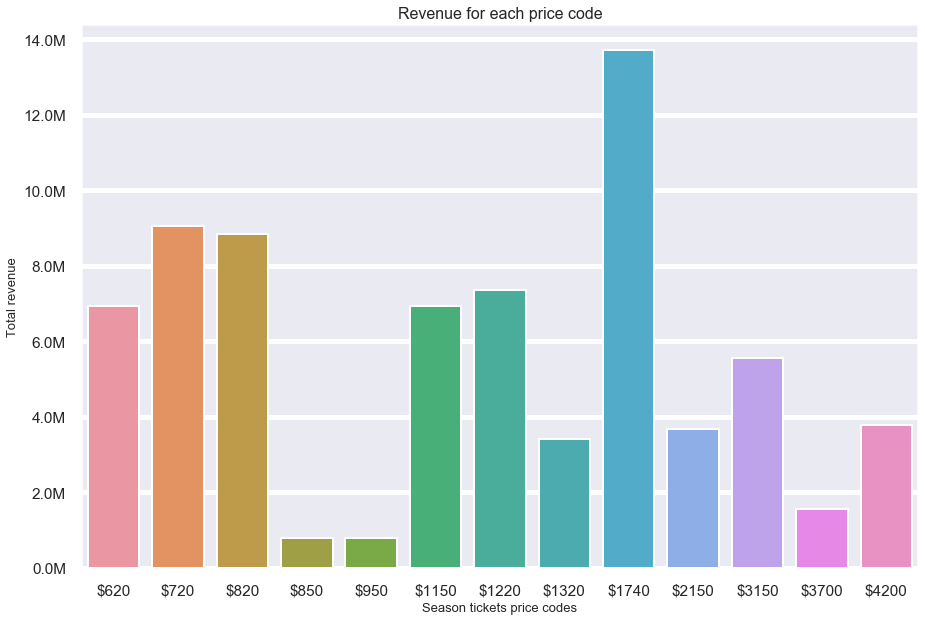

In [60]:
# revenue for each group


revenue = [6938426.061242627, 9060829.150844308, 8842247.989819828, 780454.1084269208, 790176.028116668, 6941045.578492364,
          7363544.005009291, 3400727.507473539, 13706772.538579622, 3681096.8691928578, 5554861.862729256, 1548755.817241658,
           3788308.0391047914]

plt.figure(figsize=(15,10))
sns.set_context(font_scale=15)



plot = sns.barplot(x='Section', y='Total revenue', data=pd.DataFrame({'Section': c, 'Total revenue': revenue }))
plot.yaxis.set_major_formatter(formatter)
plt.xlabel("Season tickets price codes", fontsize=13)
plt.ylabel("Total revenue", fontsize = 13)
plt.title("Revenue for each price code", fontsize=16)
plt.show()


In [61]:
# total revenue
round(sum(profit2), 2)

72397245.56

In [62]:
# This sum represent the percentages from the tickets sold in each section. It should amount to 1 but it's close enough
0.1613072634725701 + 0.18825240365193505 + 0.1613072634725701 + 0.013735153914518865 + 0.01244243354609356 + 0.09028843823220489 + 0.11888987638361477 + 0.038539225983679405 + 0.11783954108426921 + 0.025612022299426357 + 0.02637957501817888 + 0.006261614284560071 + 0.01349276884543912

0.9743475801890604

In [63]:
percentages = [0.1613072634725701, 0.18825240365193505, 0.1613072634725701, 0.013735153914518865, 0.01244243354609356, 0.09028843823220489, 0.11888987638361477, 0.038539225983679405, 0.11783954108426921, 0.025612022299426357, 0.02637957501817888, 0.006261614284560071, 0.01349276884543912]

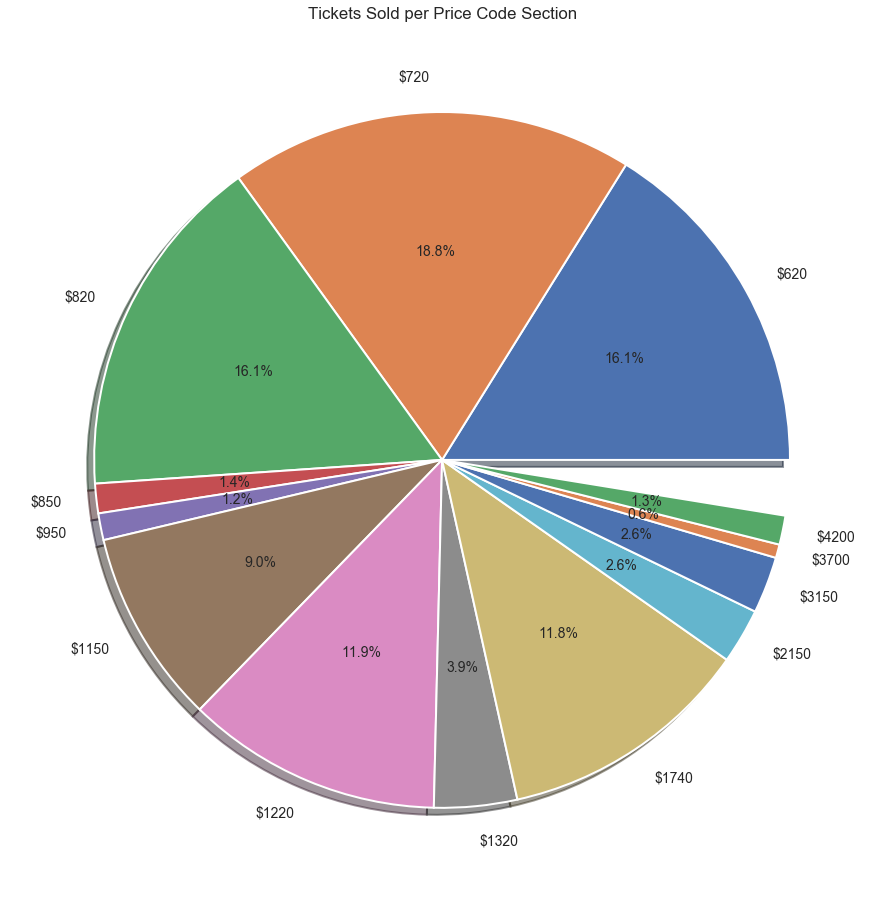

In [64]:
plt.figure(figsize=(16,16))
plt.pie(percentages, labels=c, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Tickets Sold per Price Code Section")
plt.show()

In [70]:
## note: improve charts, explain well.

## QUESTION 2

In [71]:
average_vikings_ticket_2019 = 103.98
average_vikings_ticket_2018 = 99.72
average_vikings_ticket_2021 = 108.79

In [72]:
(average_vikings_ticket_2019 - average_vikings_ticket_2018) / average_vikings_ticket_2018 * 100

4.271961492178104

In [73]:
(average_vikings_ticket_2021 - average_vikings_ticket_2019) / average_vikings_ticket_2019 * 100

4.625889594152724

In [74]:
round((4.625889594152724 + 4.271961492178104) / 2, 2)
average_increase = 1.0445

In [75]:
increase_tickets_2019 = 1.0462

In [108]:
# season ticket new prices

current_prices = [620, 720, 820, 850, 950, 1150, 1220, 1320, 1740, 2150, 3150, 3700, 4200]
new_prices = []
cagr = 1.0444

for i in current_prices:
    print(f"The current price is {i} and the projected value for the 2022 season is {round(i * cagr, 2)}")
    new_prices.append(round(i * cagr, 2))



The current price is 620 and the projected value for the 2022 season is 647.53
The current price is 720 and the projected value for the 2022 season is 751.97
The current price is 820 and the projected value for the 2022 season is 856.41
The current price is 850 and the projected value for the 2022 season is 887.74
The current price is 950 and the projected value for the 2022 season is 992.18
The current price is 1150 and the projected value for the 2022 season is 1201.06
The current price is 1220 and the projected value for the 2022 season is 1274.17
The current price is 1320 and the projected value for the 2022 season is 1378.61
The current price is 1740 and the projected value for the 2022 season is 1817.26
The current price is 2150 and the projected value for the 2022 season is 2245.46
The current price is 3150 and the projected value for the 2022 season is 3289.86
The current price is 3700 and the projected value for the 2022 season is 3864.28
The current price is 4200 and the proj

In [109]:
new_prices

[647.53,
 751.97,
 856.41,
 887.74,
 992.18,
 1201.06,
 1274.17,
 1378.61,
 1817.26,
 2245.46,
 3289.86,
 3864.28,
 4386.48]

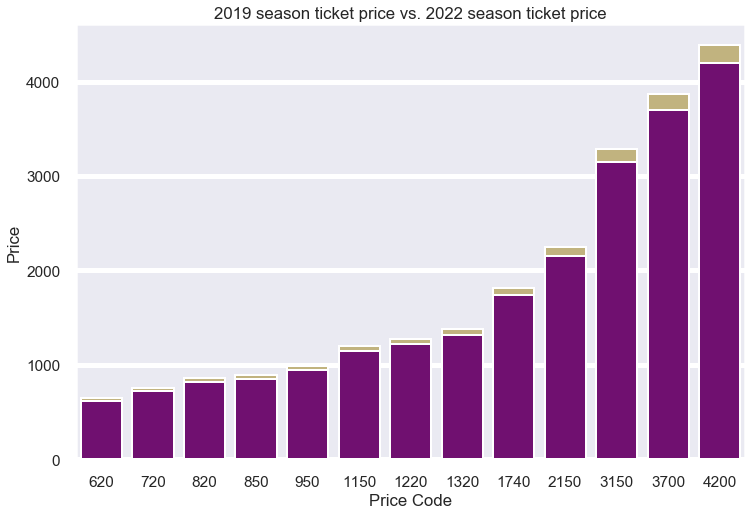

In [110]:
new_price_data_df = pd.DataFrame({'current': current_prices, 'new': new_prices })

labels=["Price 2019", "Price 2022"]

# creating subplots
ax = plt.subplots(figsize=(12,8))
 
# plotting columns
ax = sns.barplot(x=new_price_data_df["current"], y=new_price_data_df["new"], color='y')
ax = sns.barplot(x=new_price_data_df["current"], y=new_price_data_df["current"], color='purple')

 
# renaming the axes
ax.set(xlabel="Price Code", ylabel="Price")

 
# visualizing illustration
plt.title("2019 season ticket price vs. 2022 season ticket price")
plt.show()

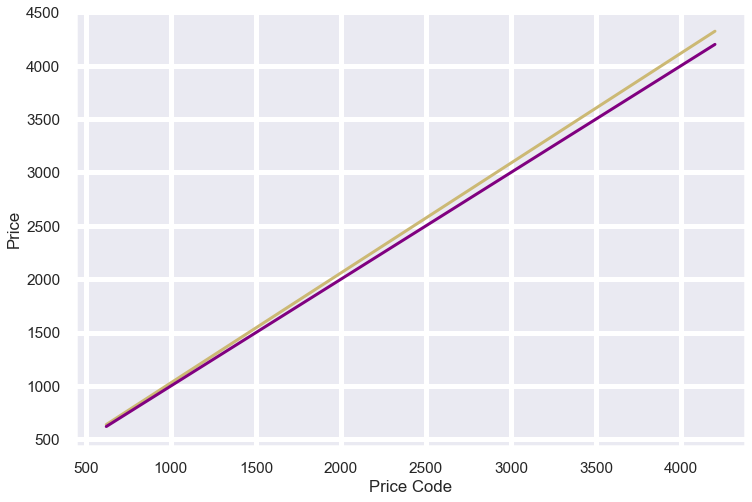

In [79]:
new_price_data_df = pd.DataFrame({'current': current_prices, 'new': new_prices })

labels=["Price 2019", "Price 2022"]

# creating subplots
ax = plt.subplots(figsize=(12,8))
 
# plotting columns
ax = sns.lineplot(data=new_price_data_df, x=new_price_data_df["current"], y=new_price_data_df["new"], color='y', ci=None)
ax = sns.lineplot(data=new_price_data_df, x=new_price_data_df["current"], y=new_price_data_df["current"], color='purple', ci=None)
#ax = sns.barplot(x=new_price_data_df["current"], y=new_price_data_df["current"], color='purple')

 
# renaming the axes
ax.set(xlabel="Price Code", ylabel="Price")

 
# visualizing illustration
plt.show()



In [80]:
(average_attendance_2019 - pe_game_tickets_sold ) * 0.01349276884543912

802.738789690555

In [81]:
3371502.916700331 / 802.738789690555

4200.0

In [82]:
data[(data['Visiting Team'] == 'Atlanta Falcons') | 
     (data['Visiting Team'] == 'Philadelphia Eagles') |
    (data['Visiting Team'] == 'Detroit Lions')]['Ticket Price'].mean()

189.92977056603678

## Question 3

In [83]:
# Check time at which most expensive tickets were bought to maximize return. 
# And check time where cheapest tickets were sold so I can buy

# check by hour
# by day
# by minute
# Do line charts

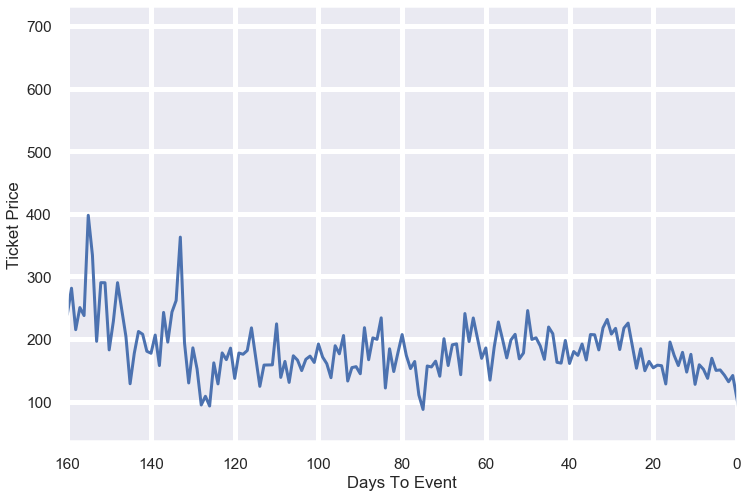

In [84]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=data, x='Days To Event', y='Ticket Price', ci=None)

ax.set_xlim(160, 0)
plt.show()

In [85]:
data['Total Price'].min()

9.99

In [86]:
data['Total Price'].max()

6400.0

In [87]:
data['Total Price'].mean()

466.5801123595494

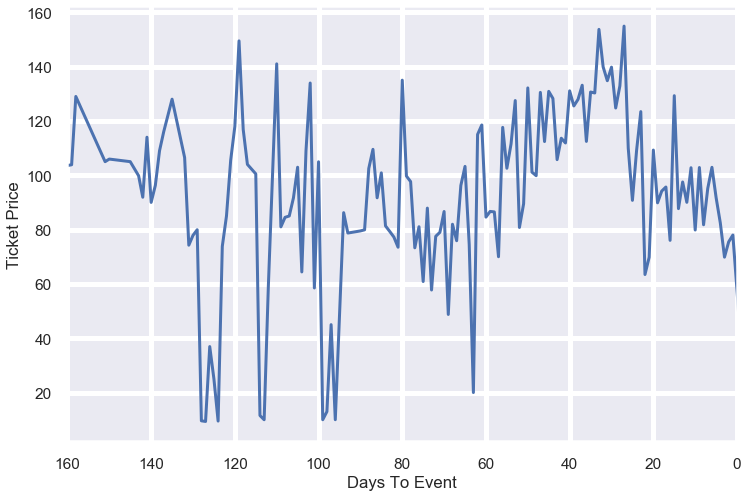

In [88]:
sections_blue = [301, 302, 303, 304, 305, 306, 307, 318, 319, 320, 321, 322, 323, 324, 325, 
            327, 328, 329, 330, 331, 332, 333, 334, 335, 347, 348, 349]

blue = data[(data['specific section'] == '301') | (data['specific section'] == '302') 
    | (data['specific section'] == '303') | (data['specific section'] == '304')
    | (data['specific section'] == '305') | (data['specific section'] == '306')
    | (data['specific section'] == '307') | (data['specific section'] == '318')
    | (data['specific section'] == '319') | (data['specific section'] == '320')
    | (data['specific section'] == '321') | (data['specific section'] == '322')
    | (data['specific section'] == '323') | (data['specific section'] == '324')
    | (data['specific section'] == '325') | (data['specific section'] == '327')
    | (data['specific section'] == '328') | (data['specific section'] == '329')
    | (data['specific section'] == '330') | (data['specific section'] == '331')
    | (data['specific section'] == '332') | (data['specific section'] == '334')
    | (data['specific section'] == '335') | (data['specific section'] == '347')
    | (data['specific section'] == '348') | (data['specific section'] == '349')]


plt.figure(figsize = (12,8))
ax = sns.lineplot(data=blue, x='Days To Event', y='Ticket Price', ci=None)

ax.set_xlim(160, 0)
plt.show()

In [89]:
# Min ticket price in
blue['Total Price'].min()

9.99

In [90]:
blue['Total Price'].max()

1691.0

In [91]:
blue[blue['Total Price'] == 1691.0]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
2335,2019-09-08 12:00:00,2019-09-08 12:00:00,2019-07-26 09:15:42,618000,Minnesota Vikings vs. Atlanta Falcons,Atlanta Falcons,44,US Bank Stadium,Upper End Zone,Upper End Zone 328,7,20,5.0,24.0,84.55,1691.0,328


In [92]:
blue['Total Price'].mean()

261.684220116618

In [93]:
blue[blue['Total Price'] == 9.99]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
109,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-05-03 10:46:31,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,113,US Bank Stadium,Upper End Zone,Upper End Zone 324,10,1,12.0,12.0,9.99,9.99,324


## Cheap Seats

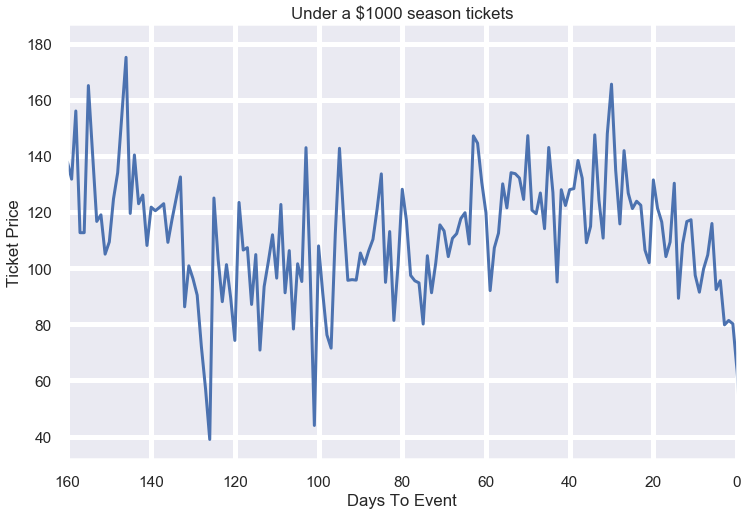

In [94]:
# Cheap seats

sections_blue = [301, 302, 303, 304, 305, 306, 307, 318, 319, 320, 321, 322, 323, 324, 325, 
            327, 328, 329, 330, 331, 332, 333, 334, 335, 347, 348, 349]

section_beige = [308, 309, 310, 315, 316, 317, 324, 325, 326, 336, 337,
               338, 344, 345, 346, 351, 352]

section_dark_green = [311, 312, 313, 314, 339, 340, 341, 342, 343]

section_light_green = [221, 222, 223, 224]

section_yellow = [219, 220, 225, 226, 242]


cheap_tickets = data[(data['specific section'] == '301') | (data['specific section'] == '302') 
    | (data['specific section'] == '303') | (data['specific section'] == '304')
    | (data['specific section'] == '305') | (data['specific section'] == '306')
    | (data['specific section'] == '307') | (data['specific section'] == '318')
    | (data['specific section'] == '319') | (data['specific section'] == '320')
    | (data['specific section'] == '321') | (data['specific section'] == '322')
    | (data['specific section'] == '323') | (data['specific section'] == '324')
    | (data['specific section'] == '325') | (data['specific section'] == '327')
    | (data['specific section'] == '328') | (data['specific section'] == '329')
    | (data['specific section'] == '330') | (data['specific section'] == '331')
    | (data['specific section'] == '332') | (data['specific section'] == '334')
    | (data['specific section'] == '335') | (data['specific section'] == '347')
    | (data['specific section'] == '348') | (data['specific section'] == '349')
    | (data['specific section'] == '308') | (data['specific section'] == '309')
    | (data['specific section'] == '310') | (data['specific section'] == '315')
    | (data['specific section'] == '316') | (data['specific section'] == '317')
    | (data['specific section'] == '324') | (data['specific section'] == '325')
    | (data['specific section'] == '326') | (data['specific section'] == '336')
    | (data['specific section'] == '337') | (data['specific section'] == '338')
    | (data['specific section'] == '344') | (data['specific section'] == '345')
    | (data['specific section'] == '346') | (data['specific section'] == '351')
    | (data['specific section'] == '352') | (data['specific section'] == '311')
    | (data['specific section'] == '312') | (data['specific section'] == '313')
    | (data['specific section'] == '314') | (data['specific section'] == '339')
    | (data['specific section'] == '340') | (data['specific section'] == '341')
    | (data['specific section'] == '342') | (data['specific section'] == '343')
    | (data['specific section'] == '221') | (data['specific section'] == '222')
    | (data['specific section'] == '223') | (data['specific section'] == '224')
    | (data['specific section'] == '219') | (data['specific section'] == '220')
    | (data['specific section'] == '225') | (data['specific section'] == '226')
    | (data['specific section'] == '242')]


plt.figure(figsize = (12,8))
ax = sns.lineplot(data=cheap_tickets, x='Days To Event', y='Ticket Price', ci=None)

ax.set_xlim(160, 0)
plt.title("Under a $1000 season tickets")
plt.show()


In [95]:
cheap_tickets['Ticket Price'].min()

8.4

In [96]:
cheap_tickets['Ticket Price'].max()

377.0

In [97]:
cheap_tickets['Ticket Price'].mean()

100.41506193425445

In [98]:
cheap_tickets[cheap_tickets['Ticket Price'] == 8.4]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
39,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-04-19 11:39:46,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,127,US Bank Stadium,Upper Sideline,Upper Sideline 310,20,2,21.0,22.0,8.4,16.8,310


In [99]:
cheap_tickets[cheap_tickets['Ticket Price'] == 377.0]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
5146,2019-10-13 12:00:00,2019-10-13 12:00:00,2019-09-12 10:18:26,617998,Minnesota Vikings vs. Philadelphia Eagles,Philadelphia Eagles,31,US Bank Stadium,Loge Sideline,Loge Sideline 342,C,4,11.0,14.0,377.0,1508.0,342


In [100]:
days_120 = cheap_tickets[(cheap_tickets['Days To Event'] > 110) & (cheap_tickets['Days To Event'] < 130)]

In [101]:
days_80 = cheap_tickets[(cheap_tickets['Days To Event'] > 70) & (cheap_tickets['Days To Event'] < 90)]

In [102]:
days_20 = cheap_tickets[(cheap_tickets['Days To Event'] > 20) & (cheap_tickets['Days To Event'] < 40)]

In [103]:
days_10 = cheap_tickets[(cheap_tickets['Days To Event'] > 1) & (cheap_tickets['Days To Event'] < 20)]

In [104]:
days_120['Ticket Price'].mean()

90.65920000000001

In [105]:
days_80['Ticket Price'].mean()

102.68679536679534

In [106]:
days_20['Ticket Price'].mean()

127.33268627450977

In [107]:
days_10['Ticket Price'].mean()

98.67237288135588

In [108]:
# By hour

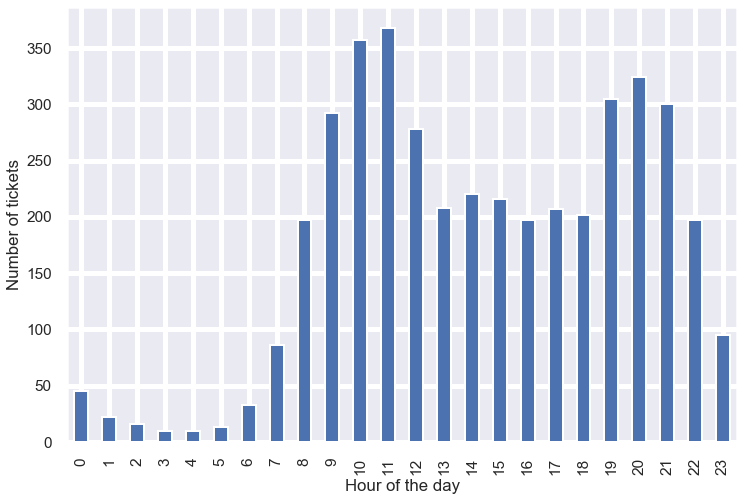

In [109]:
plt.figure(figsize=(12,8))
cheap_tickets['Sale Date/Time'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.ylabel("Number of tickets")
plt.xlabel("Hour of the day")
plt.show()

## Medium Seats

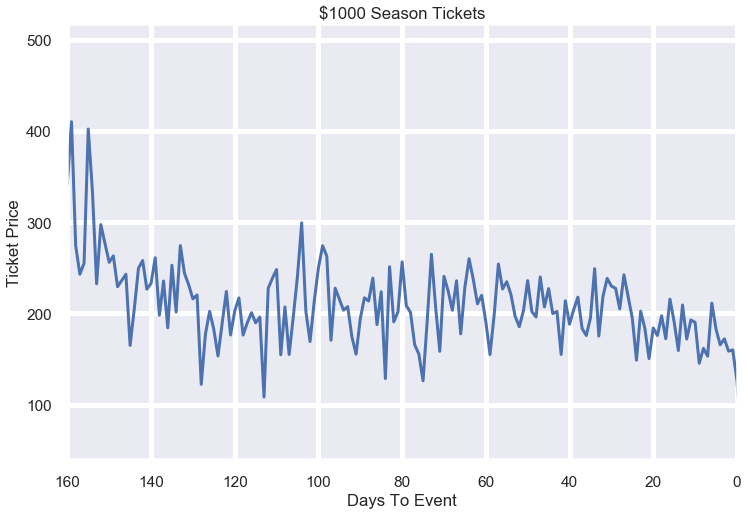

In [110]:

section_brown = [206, 207, 208, 214, 215, 216, 217, 218, 227, 228,
                 229, 230, 231, 237, 238, 239, 240, 241]

section_purple = [101, 143, 142, 141, 140, 138, 116, 118, 120, 121,
                 122]

section_light_purple = [114, 103, 124, 136]

section_grey = [105, 106, 107, 111, 112, 113, 127, 128, 129, 126, 
               130, 131, 132, 133, 134, 135]




medium_tickets = data[(data['specific section'] == '206') | (data['specific section'] == '207') 
    | (data['specific section'] == '208') | (data['specific section'] == '214')
    | (data['specific section'] == '215') | (data['specific section'] == '216')
    | (data['specific section'] == '227') | (data['specific section'] == '228')
    | (data['specific section'] == '229') | (data['specific section'] == '230')
    | (data['specific section'] == '231') | (data['specific section'] == '237')
    | (data['specific section'] == '238') | (data['specific section'] == '239')
    | (data['specific section'] == '240') | (data['specific section'] == '241')
    | (data['specific section'] == '101') | (data['specific section'] == '143')
    | (data['specific section'] == '142') | (data['specific section'] == '141')
    | (data['specific section'] == '140') | (data['specific section'] == '138')
    | (data['specific section'] == '116') | (data['specific section'] == '118')
    | (data['specific section'] == '120') | (data['specific section'] == '121')
    | (data['specific section'] == '122') | (data['specific section'] == '114')
    | (data['specific section'] == '103') | (data['specific section'] == '124')
    | (data['specific section'] == '136') | (data['specific section'] == '105')
    | (data['specific section'] == '106') | (data['specific section'] == '107')
    | (data['specific section'] == '111') | (data['specific section'] == '112')
    | (data['specific section'] == '113') | (data['specific section'] == '127')
    | (data['specific section'] == '128') | (data['specific section'] == '129')
    | (data['specific section'] == '126') | (data['specific section'] == '130')
    | (data['specific section'] == '131') | (data['specific section'] == '132')
    | (data['specific section'] == '133') | (data['specific section'] == '134')
    | (data['specific section'] == '135')]


plt.figure(figsize = (12,8))
ax = sns.lineplot(data=medium_tickets, x='Days To Event', y='Ticket Price', ci=None)

ax.set_xlim(160, 0)
plt.title("$1000 Season Tickets")
plt.show()

In [111]:
medium_tickets['Ticket Price'].min()

10.0

In [112]:
medium_tickets['Ticket Price'].max()

799.99

In [113]:
medium_tickets['Ticket Price'].mean()

187.24684340320593

In [114]:
medium_tickets[medium_tickets['Ticket Price'] == 10.0]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
8361,2019-12-08 12:00:00,2019-12-08 12:00:00,2019-12-08 12:38:54,617996,Minnesota Vikings vs. Detroit Lions,Detroit Lions,-1,US Bank Stadium,Middle Sideline,Middle Sideline 241,18,2,22.0,23.0,10.0,20.0,241


In [115]:
medium_tickets[medium_tickets['Ticket Price'] == 799.99]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
5500,2019-10-13 12:00:00,2019-10-13 12:00:00,2019-10-01 21:38:44,617998,Minnesota Vikings vs. Philadelphia Eagles,Philadelphia Eagles,11,US Bank Stadium,Lower End Zone,Lower End Zone 141,1,2,12.0,13.0,799.99,1599.98,141


In [116]:
days_120 = medium_tickets[(medium_tickets['Days To Event'] > 110) & (medium_tickets['Days To Event'] < 130)]
days_80 = medium_tickets[(medium_tickets['Days To Event'] > 70) & (medium_tickets['Days To Event'] < 90)]
days_20 = medium_tickets[(medium_tickets['Days To Event'] > 20) & (medium_tickets['Days To Event'] < 40)]
days_10 = medium_tickets[(medium_tickets['Days To Event'] > 0) & (medium_tickets['Days To Event'] < 20)]

In [117]:
days_120['Ticket Price'].mean()

189.94335616438357

In [118]:
days_80['Ticket Price'].mean()

200.5610407239819

In [119]:
days_20['Ticket Price'].mean()

203.86147540983592

In [120]:
days_10['Ticket Price'].mean()

173.44264591439685

## Premium Seats

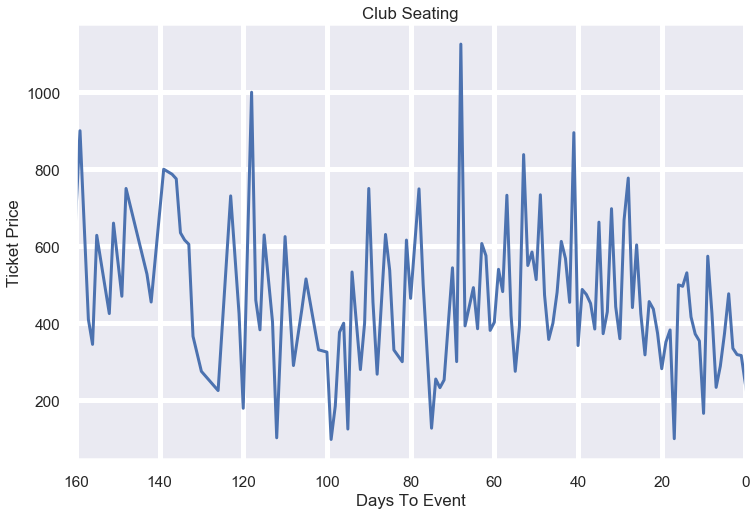

In [121]:
section_fmp = [' C1', ' C2', ' C3', ' C4', ' C5', ' C6', ' C7', ' C8', ' C9', 'C10']

section_polaris = ['V 1', 'V 2', 'V 3', 'V 4', 'V 5']

section_medtronic = [' V6', ' V7', ' V8', ' V9', 'V10']

section_delta = [' F1', ' F2', ' F3', ' F4', ' F5']


premium_tickets = data[(data['specific section'] == ' C1') | (data['specific section'] == ' C2') 
    | (data['specific section'] == ' C3') | (data['specific section'] == ' C4')
    | (data['specific section'] == ' C5') | (data['specific section'] == ' C6')
    | (data['specific section'] == ' C7') | (data['specific section'] == ' C8')
    | (data['specific section'] == ' C9') | (data['specific section'] == 'C10')
    | (data['specific section'] == 'V 1') | (data['specific section'] == 'V 2')
    | (data['specific section'] == 'V 3') | (data['specific section'] == 'V 4')
    | (data['specific section'] == 'V 5') | (data['specific section'] == ' V6')
    | (data['specific section'] == ' V7') | (data['specific section'] == ' V8')
    | (data['specific section'] == ' V9') | (data['specific section'] == 'V10')
    | (data['specific section'] == ' F1') | (data['specific section'] == ' F2')
    | (data['specific section'] == ' F3') | (data['specific section'] == ' F4')
    | (data['specific section'] == ' F5')]


plt.figure(figsize = (12,8))
ax = sns.lineplot(data=premium_tickets, x='Days To Event', y='Ticket Price', ci=None)

ax.set_xlim(160, 0)
plt.title("Club Seating")
plt.show()

In [122]:
premium_tickets['Ticket Price'].min()

36.05

In [123]:
premium_tickets['Ticket Price'].max()

1600.0

In [124]:
premium_tickets['Ticket Price'].mean()

385.09555555555534

In [125]:
premium_tickets[premium_tickets['Ticket Price'] == 36.05]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
1715,2019-08-24 12:00:00,2019-08-24 12:00:00,2019-08-24 12:15:39,633298,NFL Preseason: Minnesota Vikings vs. Arizona C...,Arizona Cardinals,-1,US Bank Stadium,Vikings Club,Hyundai Club V 3,34,2,3.0,4.0,36.05,72.1,V 3


In [126]:
premium_tickets[premium_tickets['Ticket Price'] == 1600.0]

,Event Date/Time,Time,Sale Date/Time,Event Id,Event,Visiting Team,Days To Event,Venue,Zone,Section,Row,Ticket Qty,Low Seat,High Seat,Ticket Price,Total Price,specific section
5492,2019-10-13 12:00:00,2019-10-13 12:00:00,2019-10-01 16:50:45,617998,Minnesota Vikings vs. Philadelphia Eagles,Philadelphia Eagles,11,US Bank Stadium,Field Club,Delta Sky360 Club F3,1,4,7.0,10.0,1600.0,6400.0,F3


In [127]:
days_120 = premium_tickets[(premium_tickets['Days To Event'] > 110) & (premium_tickets['Days To Event'] < 130)]
days_80 = premium_tickets[(premium_tickets['Days To Event'] > 70) & (premium_tickets['Days To Event'] < 90)]
days_20 = premium_tickets[(premium_tickets['Days To Event'] > 20) & (premium_tickets['Days To Event'] < 40)]
days_10 = premium_tickets[(premium_tickets['Days To Event'] > 1) & (premium_tickets['Days To Event'] < 20)]

In [128]:
days_120['Ticket Price'].mean()

447.98315789473685

In [129]:
days_80['Ticket Price'].mean()

404.86096774193555

In [130]:
days_20['Ticket Price'].mean()

469.91525252525247

In [131]:
days_10['Ticket Price'].mean()

383.394972972973

In [132]:
# Conclusions

## Question 4

### What additional information would be helpful to project the value of a season ticket?